In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
#reading dataset
df = pd.read_csv("emails.csv")

In [3]:
df.head()

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay   
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0  \
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.describe()

the           to          ect          and          for   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  \
mean      6.640565     6.188128     5.143852     3.075599     3.124710   
std      11.745009     9.534576    14.101142     6.045970     4.680522   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000     1.000000     0.000000     1.000000   
50%       3.000000     3.000000     1.000000     1.000000     2.000000   
75%       8.000000     7.000000     4.000000     3.000000     4.000000   
max     210.000000   132.000000   344.000000    89.000000    47.000000   

                of            a          you          hou           in  ...   
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  ...  \
mean      2.627030    55.517401     2.466551     2.024362    10.600155  ...   
std       6.229845    87.574172     4.314444     6.967878    19.281892  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000    12.000000     0.000000     0.000000     1.000000  ...   
50%       1.000000    28.000000     1.000000     0.000000     5.000000  ...   
75%       2.000000    62.250000     3.000000     1.000000    12.000000  ...   
max      77.000000  1898.000000    70.000000   167.000000   223.000000  ...   

          connevey          jay       valued          lay  infrastructure   
count  5172.000000  5172.000000  5172.000000  5172.000000     5172.000000  \
mean      0.005027     0.012568     0.010634     0.098028        0.004254   
std       0.105788     0.199682     0.116693     0.569532        0.096252   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     0.000000     0.000000        0.000000   
50%       0.000000     0.000000     0.000000     0.000000        0.000000   
75%       0.000000     0.000000     0.000000     0.000000        0.000000   
max       4.000000     7.000000     2.000000    12.000000        3.000000   

          military     allowing           ff          dry   Prediction  
count  5172.000000  5172.000000  5172.000000  5172.000000  5172.000000  
mean      0.006574     0.004060     0.914733     0.006961     0.290023  
std       0.138908     0.072145     2.780203     0.098086     0.453817  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     1.000000     0.000000     1.000000  
max       4.000000     3.000000   114.000000     4.000000     1.000000  

[8 rows x 3001 columns]

In [14]:
X = df.iloc[:,1:3001]
X
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [16]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2 ,random_state=12)

In [17]:
# Feature Scaling  

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
#KNN
#Fitting K-NN classifier to the training set  

from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_train, Y_train) 

KNeighborsClassifier()

In [22]:
#predictions
Y_pred_knn = knn.predict(X_test)
Y_pred_knn

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
#Confusion matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[586, 113],
       [ 24, 312]], dtype=int64)

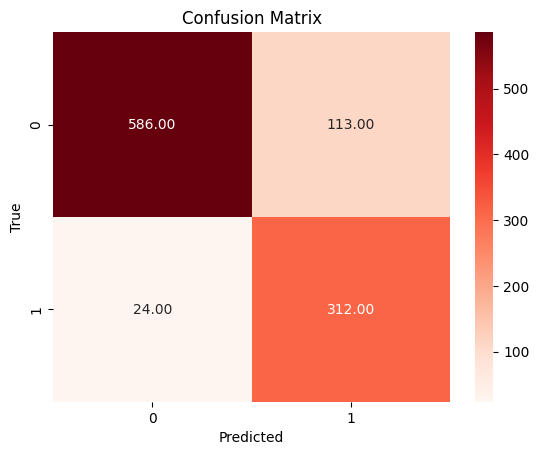

In [25]:
# Confusion matrix graph using seaborn

sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
accuracy_score(Y_test, Y_pred_knn)

0.8676328502415459

In [30]:
#support vector machines
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=0)  
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [31]:
#prediction
Y_pred_svc = svc.predict(X_test)
Y_pred_svc

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [33]:
cm = confusion_matrix(Y_test, Y_pred_svc)
cm

array([[685,  14],
       [ 44, 292]], dtype=int64)

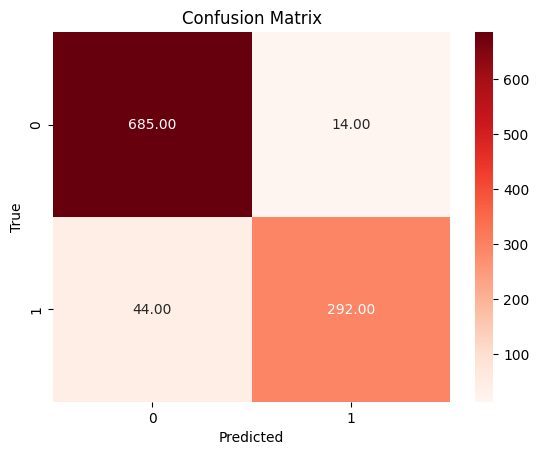

In [34]:
# Confusion matrix graph using seaborn
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#accuracy score

accuracy_score(Y_test, Y_pred_svc)

0.9439613526570049